Name: Saniya Devale<br/>
Task 3: SALES PREDICTION USING PYTHON


Importing Libraries


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Reading csv files and Exploring Data

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data Visualization

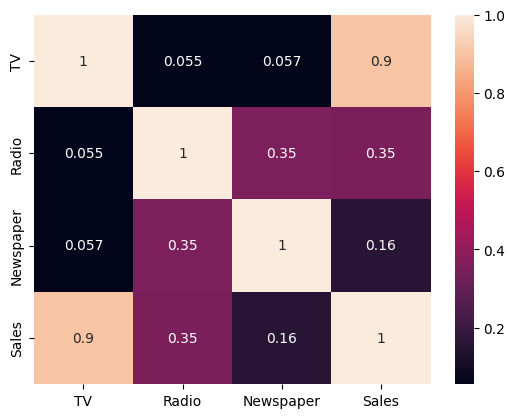

In [ ]:

sn.heatmap(df.corr(),annot=True)
plt.show()



<ipython-input-9-1190c4b6834a>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
<ipython-input-9-1190c4b6834a>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
<ipython-input-9-1190c4b6834a>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")


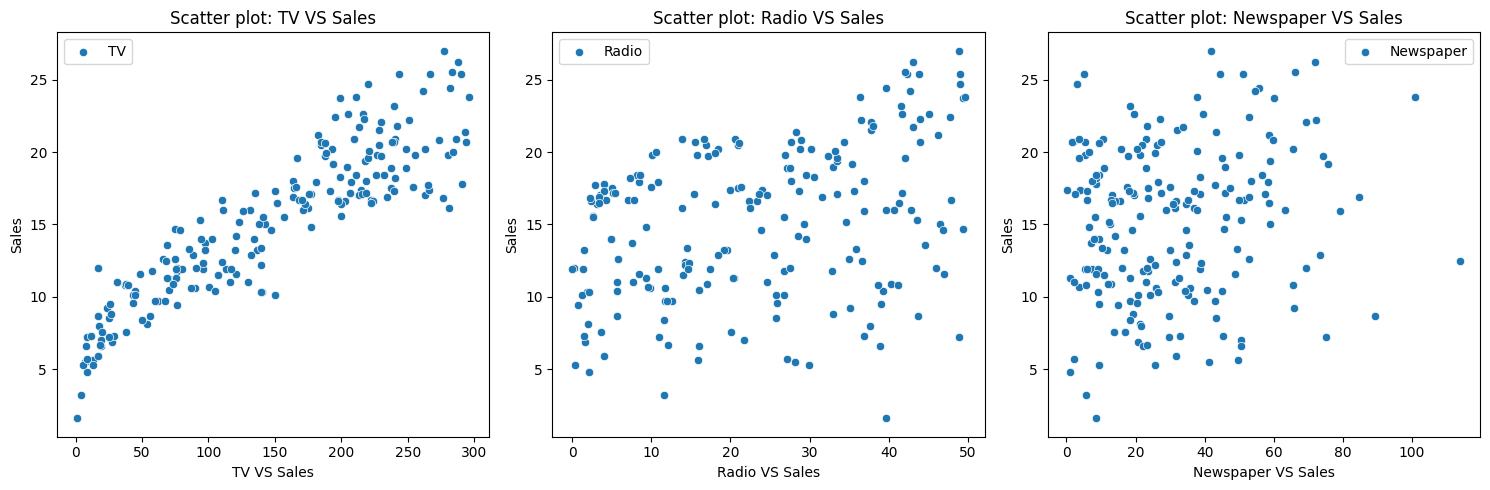

In [ ]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sn.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

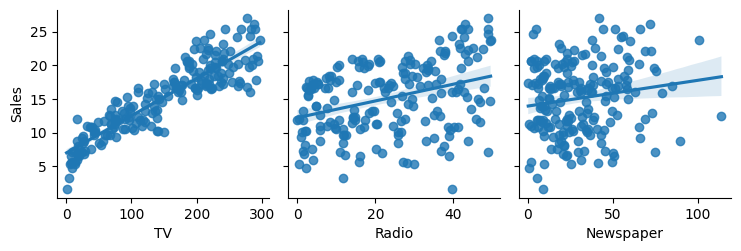

In [ ]:
sn.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

Training Model using Linear Regression

In [ ]:
X = df.drop(columns='Sales',axis=1)
Y = df['Sales']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [ ]:
lr.intercept_

4.714126402214127

In [ ]:

predictions = lr.predict(x_test)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

# Print the R-squared score
print('R-squared score:', r2)


R-squared score: 0.9059011844150826


Testing Model

In [ ]:
TV = float(input("Enter TV budget: "))
Radio = float(input("Enter Radio Budget: "))
Newspaper = float(input("Enter Newspaper Budget: "))

input_list = [TV,Radio,Newspaper]
feature_name = df.drop(['Sales'],axis=1).columns.tolist()
input_df = pd.DataFrame([input_list],columns=feature_name)
Prediction = lr.predict(input_df)
print(Prediction)

Enter TV budget: 37.8
Enter Radio Budget: 3.7
Enter Newspaper Budget: 13.8
[7.20792041]
